<a href="https://colab.research.google.com/github/swarnava-96/Time-Series/blob/main/ARIMA_and_Seasonal_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time series Forecasting using ARIMA and Seasonal ARIMA**

#### Autoregressive Integrated Moving Averages
The general process for ARIMA models is the following:

1. Visualize the Time Series Data
2. Make the time series data stationary
3. Plot the Correlation and AutoCorrelation Charts
4. Construct the ARIMA Model or Seasonal ARIMA based on the data
5. Use the model to make predictions

In [1]:
cd "/content/drive/MyDrive/Datasets"

/content/drive/MyDrive/Datasets


### Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset

In [3]:
df = pd.read_csv("perrin-freres-monthly-champagne-.csv")
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
# Lets see the last five rows 

df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


### Data Preprocessing
Lets clean up the dataset

In [5]:
# Lets rename the columns

df.columns = ["Month", "Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
# Lets drop the last two records as these records are NaN

df.drop(105, axis = 0, inplace = True)
df.drop(106, axis = 0, inplace = True)
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [7]:
# Lets see the datatypes of the features

df.dtypes

Month     object
Sales    float64
dtype: object

In [8]:
# Lets convert "Month" into datetime format

df["Month"] = pd.to_datetime(df["Month"])
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [9]:
# Lets check the datatypes now

df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [10]:
# Lets set "Month" as the index

df.set_index("Month", inplace = True)
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [11]:
# Lets see the description of the dataset

df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


### Visualize the Time Series Data

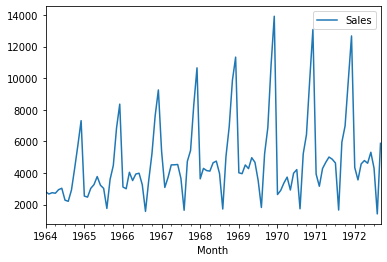

In [12]:
df.plot();

### Testing the data for Stationarity
In this step we will perform the Augmented Dicky Fuller's test.

In [13]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
test_results = adfuller(df["Sales"])

In [15]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
# Lets see what ADF test gives with our sales column
adfuller_test(df["Sales"])

ADF Test Statistic : -1.8335930563276228
p-value : 0.363915771660245
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing
Used when the data is non-stationary.

In [17]:
# Here we will shift the sales value by 1

df["Sales First Difference"] = df["Sales"] - df["Sales"].shift(1)

In [19]:
df["Sales First Difference"]

Month
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Name: Sales First Difference, Length: 105, dtype: float64

Since, our data is monthly seasonal, we should shift by 12. 

In [21]:
df["Seasonal First Difference"] = df["Sales"] - df["Sales"].shift(12)

In [22]:
# Lets check our data

df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [23]:
# Again test dickey fuller test

adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


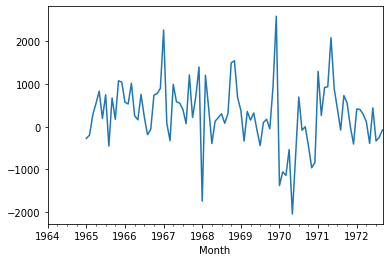

In [25]:
# Lets plot our stationary data

df['Seasonal First Difference'].plot();

### Auto Regressive Model

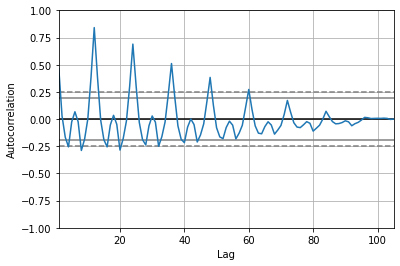

In [29]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

#### Final Thoughts on Autocorrelation and Partial Autocorrelation
* Identification of an AR model is often best done with the PACF.
For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

* For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

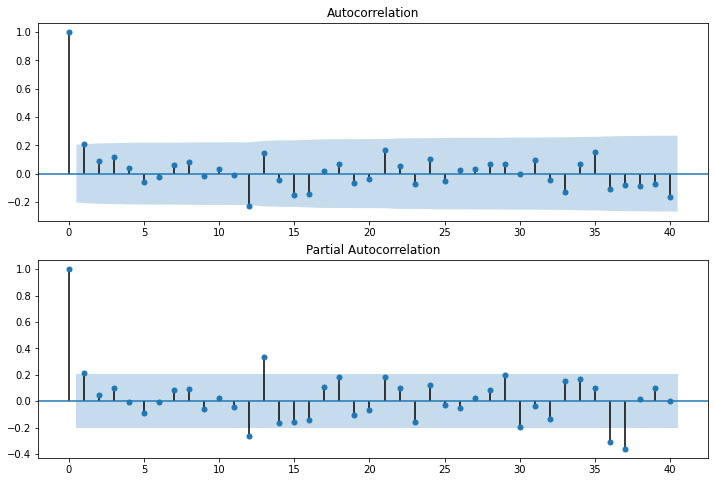

In [32]:
# Lets plot the ACF and the PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)  #  The first 13 values are NaN, so we will not include these values
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

Here, We will take p = 1, q = 0, d = 1. Where p = AR value, q = MA value and d is the number of times differencing performed to make the data stationary.

ARIMA model is used for non seasonal data. Here, the data is seasonal so we will apply SARIMAX. But before that lets see how ARIMA works even with this seasonal data.

In [33]:
from statsmodels.tsa.arima_model import ARIMA

In [34]:
# Fitting ARIMA model

model = ARIMA(df["Sales"], order = (1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [35]:
# Lets see the summary

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Fri, 10 Sep 2021   AIC                           1910.251
Time:                        15:12:33   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7848     12.405      1.837      0.069      -1.529      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

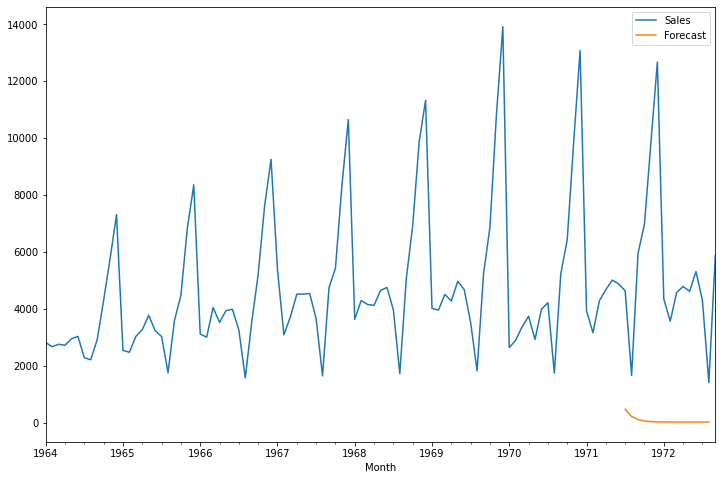

In [36]:
# Model Forecast
df["Forecast"] = model_fit.predict(start = 90, end = 103, dynamic = True)

# Lets plot
df[["Sales", "Forecast"]].plot(figsize = (12,8));

### SARIMAX 

In [37]:
import statsmodels.api as sm

In [38]:
model = sm.tsa.statespace.SARIMAX(df["Sales"], order = (1,1,1), seasonal_order = (1,1,1,12))  # 12 is the number of shifts we did earlier
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


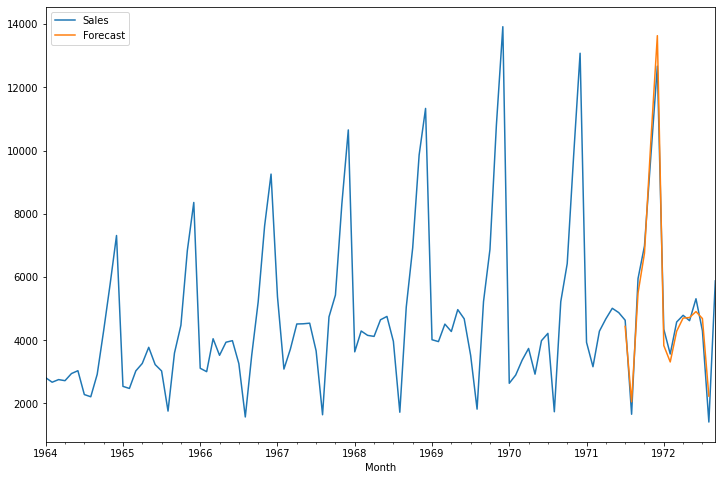

In [39]:
# Forecast
df["Forecast"] = results.predict(start = 90, end = 103, dynamic = True)

# Lets Visualize
df[["Sales", "Forecast"]].plot(figsize = (12,8));

### Future Forecast using SARIMAX

In [40]:
# Lets create the data points 

from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,24)]

In [41]:
# Lets convert into a Data frame

future_dataset_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)

In [42]:
# Lets check our future dataframe

future_dataset_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,Forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [43]:
# Lets concat the future dataset with our actual dataset

future_df = pd.concat([df, future_dataset_df])

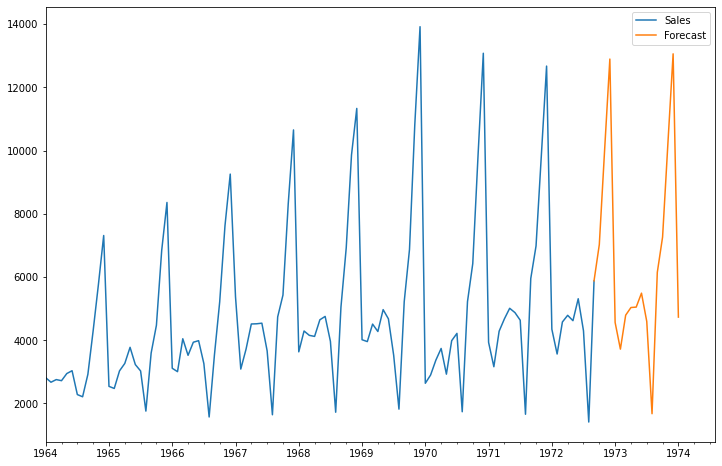

In [44]:
# Forecasting
future_df['Forecast'] = results.predict(start = 104, end = 120, dynamic = True)

# Lets Visualize
future_df[["Sales", "Forecast"]].plot(figsize = (12,8));